In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../datasets/Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.shape

(400, 3)

In [5]:
class_0 = df[df['Purchased']==0]
class_1 = df[df['Purchased']==1]

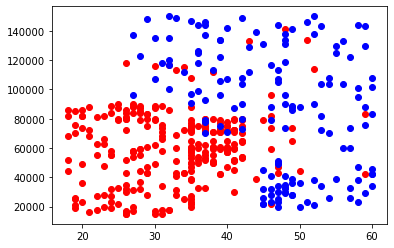

In [7]:
plt.scatter(class_0['Age'], class_0['EstimatedSalary'], c='red')
plt.scatter(class_1['Age'], class_1['EstimatedSalary'], c='blue')

In [41]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=18)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) # Min and Max values of cols

MinMaxScaler()

In [44]:
X_train_scaled = scaler.transform(X_train)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [46]:
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [48]:
q0 = [[25,40000]]
model.predict(scaler.transform(q0))

array([0], dtype=int64)

In [49]:
X_test_scaled = scaler.transform(X_test)
model.score(X_test_scaled, y_test)

0.92

In [51]:
for i in range(1,10,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_scaled,y_train)
    score = model.score(X_test_scaled,y_test)
    print('N:',i,'Score:',score)

N: 1 Score: 0.88
N: 3 Score: 0.91
N: 5 Score: 0.92
N: 7 Score: 0.94
N: 9 Score: 0.91


In [52]:
final_model = KNeighborsClassifier(n_neighbors=7)
X_scaled = scaler.fit_transform(X)
final_model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
final_model